In [14]:
from ssestm import SSESTM
from tqdm import tqdm
import pandas as pd
import numpy as np

# 1. Load data

In [15]:
df = pd.read_csv("./data/articles.csv")

In [16]:
df.head()

,Date,Price,Volume,Return,Open,Return2,Title,Body
0,20020116,18.86,84390.0,-0.0021,18.86,0.000000,Crude Oil Inputs Remain High For This Time of ...,Crude Oil Inputs Remain High For This Time of ...
1,20020124,19.70,83910.0,0.0103,19.48,0.011230,Crude Oil Inputs Fall; Are Further Declines Ye...,Crude Oil Inputs Fall; Are Further Declines Ye...
2,20020130,19.08,93920.0,-0.0255,19.58,-0.025868,Crude Oil Inputs Fall Substantially Last Week,Crude Oil Inputs Fall Substantially Last Week\...
3,20020206,19.78,79320.0,-0.0144,20.01,-0.011561,Crude Oil Inputs Remain Low While Product Stoc...,Crude Oil Inputs Remain Low While Product Stoc...
4,20020213,21.18,99170.0,0.0217,20.58,0.028738,Last Week's Petroleum Supply Data: Continuatio...,Last Week’s Petroleum Supply Data: Continuatio...


# 2. Model initializing

In [17]:
# If you initialize at the first time, you need to 
model = SSESTM()

In [18]:
# model.train(path="./data/articles.csv")

In [19]:
model.load_params()
return_values = []
sentiments_scores = []
for idx, row in tqdm(df.iterrows()):
    if not pd.isna(row["Return2"]) and not pd.isna(row["Return2"]):
        try:
            return_values.append(row["Return2"])
            sentiments_scores.append(model.predict(row["Body"]))
        except:
            # Exception for math domain error due to the limitation of gradient descent.
            return_values.pop()
            continue

922it [01:23, 11.90it/s]


# 3. Plot correlation

[DEBUG] Loaded backend module://ipykernel.pylab.backend_inline version unknown.


False


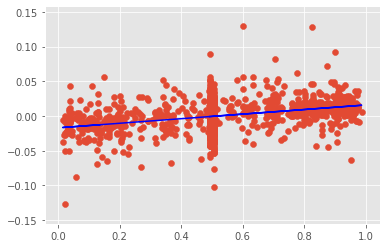

In [20]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
matplotlib.style.use('ggplot')

return_values = np.array(return_values, dtype=float).reshape(-1, 1)
sentiments_scores = np.array(sentiments_scores, dtype=float).reshape(-1, 1)

print(np.any(np.isnan(return_values)))
sentiments_scores = np.where(np.isnan(sentiments_scores), sentiments_scores.mean(), sentiments_scores)

linear_regressor = LinearRegression()
linear_regressor.fit(sentiments_scores, return_values)

plt.scatter(sentiments_scores, return_values)

plt.plot(sentiments_scores, linear_regressor.predict(sentiments_scores), color='blue')
plt.show()